### using DNN (Densely-connected Neural Network) (Also A "Multilayer Perceptron")
### DNN used for `Tabular Data`

#### Feed Forward DNN
#### all nodes in a previous layer -> all nodes in subsequent layer


### Neural Network
#### input layer - Hidden Layer - output layer


#### Neural network works in 2 ways
### Feed Forward
### Back Propagation
    Back prop - two phases (a)dcost/dwo (b)dcost/dbo; i.e. minimize cost wrt weight and bias

    Use the CPU version of tensorflow or the GPU version with tf version<2.11 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")
import tensorflow as tf

print (tf.__version__)


2.18.0


In [8]:
data_path = "./datasets/carprice/train-data.csv"
car_dataset = pd.read_csv(data_path, engine='python')

In [9]:
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
car_dataset.isnull().mean()*100

Unnamed: 0            0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.033228
Engine                0.598106
Power                 0.598106
Seats                 0.697790
New_Price            86.310018
Price                 0.000000
dtype: float64

In [11]:
car_dataset.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [12]:
car_dataset = car_dataset.drop(['Unnamed: 0', 'New_Price'], axis=1)


In [13]:
car_dataset.isnull().mean()*100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

<Axes: >

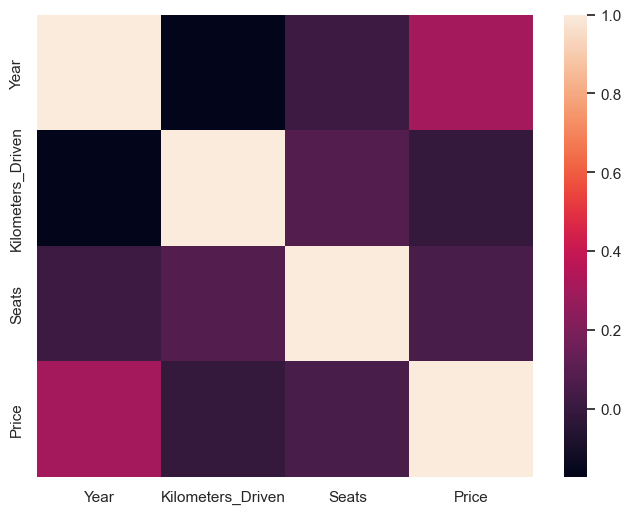

In [14]:
plt.rcParams["figure.figsize"]=[8,6]
numeric_df = car_dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())

<Axes: xlabel='Price', ylabel='Count'>

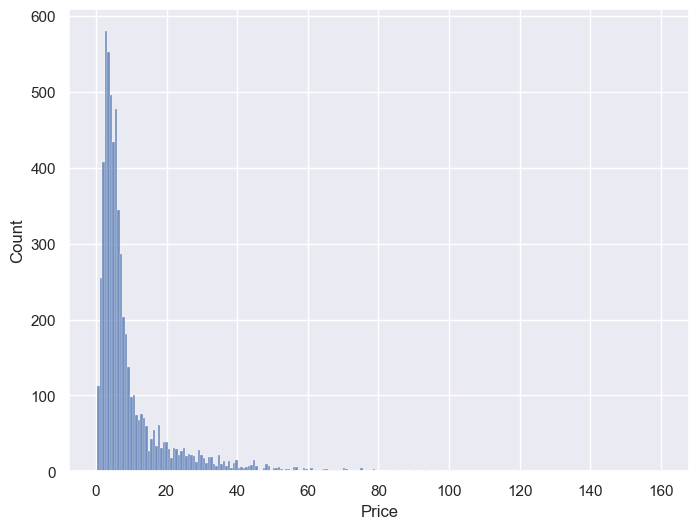

In [15]:
sns.histplot(car_dataset['Price'])

In [16]:
car_dataset.nunique()


Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [17]:
car_dataset.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [18]:
categorical_data = car_dataset.select_dtypes(include=['object'])
categorical_data.columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

In [19]:
categorical_data = categorical_data.drop(["Name"], axis=1)

In [20]:
categorical_data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [21]:
import tensorflow as tf

In [22]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [23]:
tf.reduce_sum(tf.random.normal([1000, 1000]))

<tf.Tensor: shape=(), dtype=float32, numpy=-180.31997680664062>

### Using One-hot-encoding
    using pd.get_dummies()

In [25]:
categorical_data__one_hot = pd.get_dummies(categorical_data, drop_first=True)
categorical_data__one_hot.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
complete_dataset = pd.concat([numeric_df, categorical_data__one_hot], axis=1)
complete_dataset.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000,5.0,12.50,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,46000,5.0,4.50,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2012,87000,7.0,6.00,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2013,40670,5.0,17.74,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
complete_dataset.isnull().mean()

Year                  0.000000
Kilometers_Driven     0.000000
Seats                 0.006978
Price                 0.000000
Location_Bangalore    0.000000
                        ...   
Power_98.82 bhp       0.000000
Power_98.96 bhp       0.000000
Power_99 bhp          0.000000
Power_99.6 bhp        0.000000
Power_null bhp        0.000000
Length: 979, dtype: float64

In [28]:
complete_dataset.dropna(inplace=True) # removing null row

In [29]:
X=complete_dataset.drop(['Price'], axis=1)
y=complete_dataset['Price']

In [30]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Creating the neural network

In [33]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [34]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0=Dense(100, activation='relu')(input_layer)
dense_layer1=Dense(50, activation='relu')(dense_layer0)
dense_layer2=Dense(25, activation='relu')(dense_layer1)
dense_layer3=Dense(10, activation='relu')(dense_layer2)
dense_layer4=Dense(5, activation='relu')(dense_layer3)
dense_layer5=Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [35]:
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

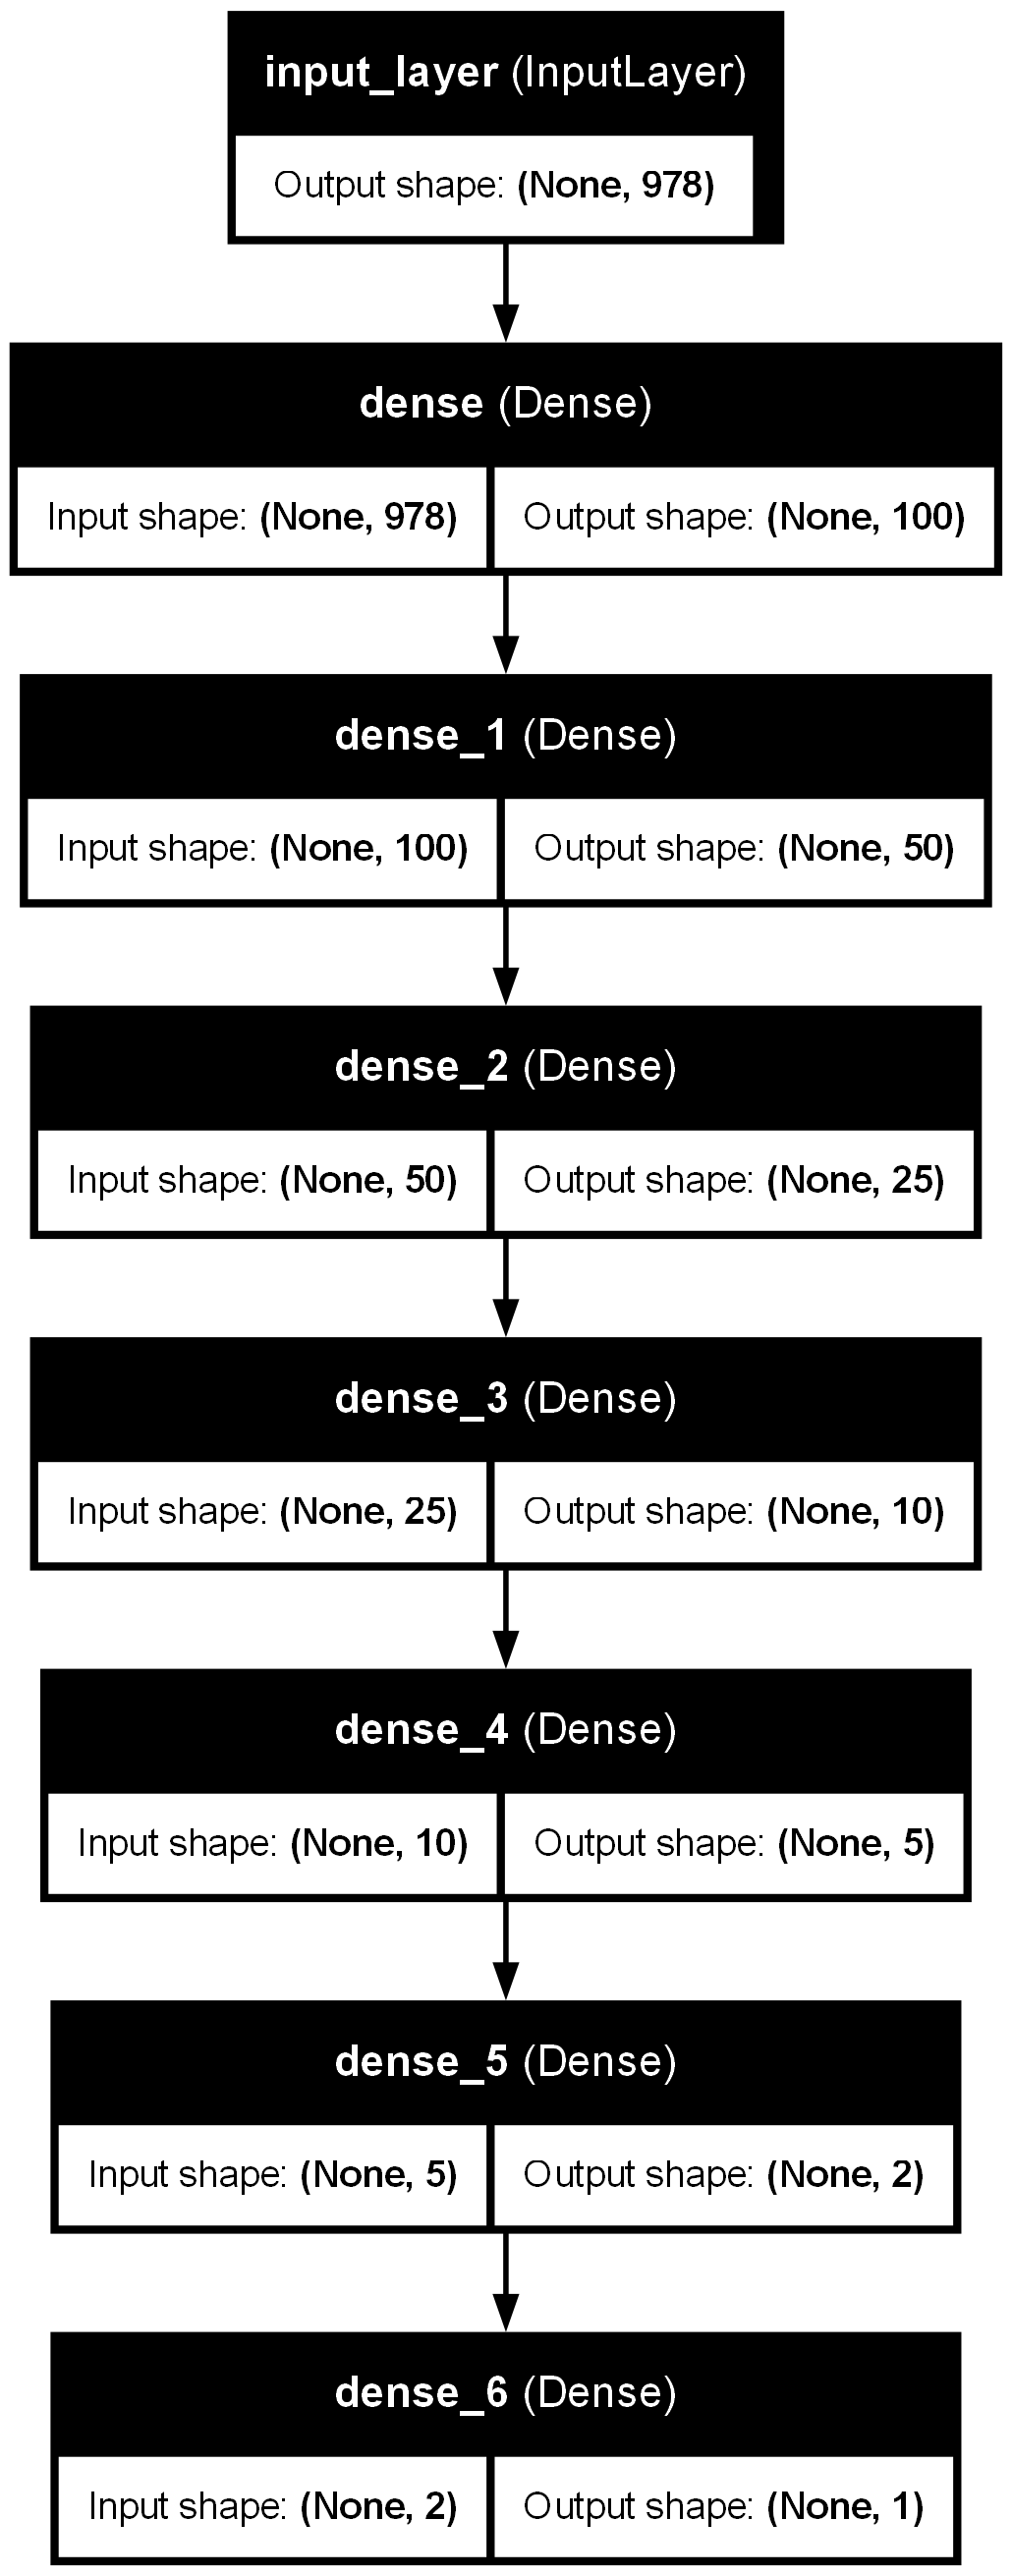

In [36]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
history=model.fit(X_train,y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4.9906 - mean_absolute_error: 4.9906 - val_loss: 2.3350 - val_mean_absolute_error: 2.3350
Epoch 2/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2215 - mean_absolute_error: 2.2215 - val_loss: 2.0214 - val_mean_absolute_error: 2.0214
Epoch 3/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6787 - mean_absolute_error: 1.6787 - val_loss: 2.1681 - val_mean_absolute_error: 2.1681
Epoch 4/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5520 - mean_absolute_error: 1.5520 - val_loss: 1.9690 - val_mean_absolute_error: 1.9690
Epoch 5/5
765/765 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4337 - mean_absolute_error: 1.4337 - val_loss: 1.9553 - val_mean_absolute_error: 1.9553


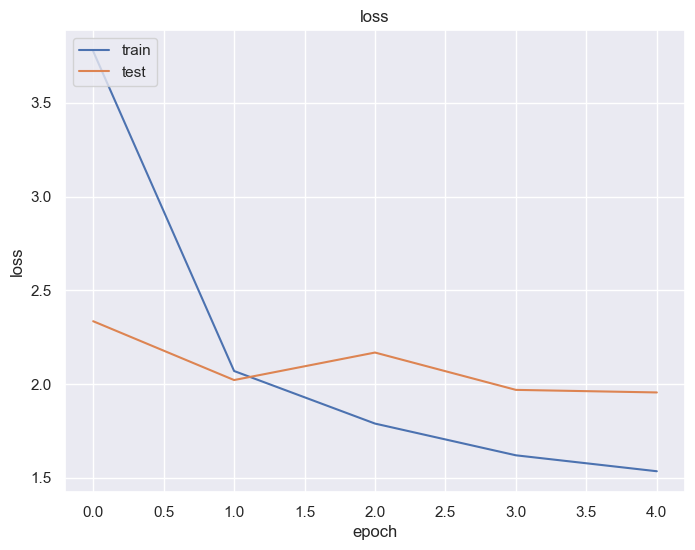

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')
plt.ylabel('loss' )
plt.xlabel('epoch' )
plt.legend(['train' ,'test'], loc='upper left')
plt.show()

In [39]:
y_pred = model.predict(X_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [77]:
from sklearn import metrics
print(f"Mean Absolute Error:{metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error:{metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error:{np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2 Score:{metrics.r2_score(y_test, y_pred)*100}")

Mean Absolute Error:2.1083894113972037
Mean Squared Error:23.27176154871026
Root Mean Squared Error:4.82408142019911
R2 Score:79.55506487409372


In [79]:
car_dataset['Price'].mean()

9.47946835022429

In [81]:
# Prices differ by 2.1/9.47 = 0.22 -> on avg, prices predicted differ by 19.6%

In [83]:
comparison_df = pd.DataFrame({'Actual':y_test.values.tolist(), 'Predicted':y_pred.tolist()})
comparison_df

,Actual,Predicted
0,8.25,[10.142377853393555]
1,5.08,[4.95290470123291]
2,4.50,[7.94775390625]
3,28.50,[18.516761779785156]
4,7.25,[8.049116134643555]
...,...,...
1191,7.50,[7.6061882972717285]
1192,21.67,[21.21645736694336]
1193,4.60,[5.18857479095459]
1194,8.00,[16.408056259155273]


In [91]:
X_test[1].shape

(978,)

In [93]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 978)

In [95]:
model.predict(X_test[1].reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


array([[4.9529047]], dtype=float32)

In [97]:
y_test.values[1]

5.08